#### Import Required Library

In [300]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### - Load Data Set

In [301]:
df=pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### * Get details information of data set

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [116]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [260]:
# df=df[df.BHK>3]
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


#### Draw regrassion curve to to visualize the dataset and understand the outlier

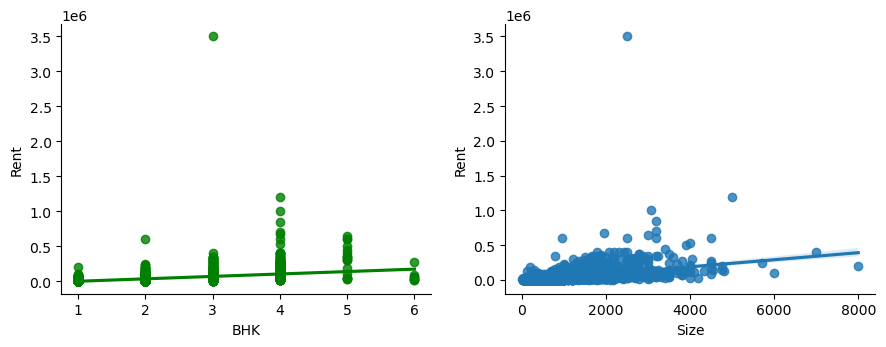

In [299]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10.5, 3.5)
sns.regplot(data=df,x=df[['BHK']],y=df['Rent'],ax=axes[0],color='green')
sns.regplot(data=df,x=df['Size'],y=df['Rent'],ax=axes[1])
sns.despine()


### Outlier detection technique

In [302]:
from scipy import stats
import math as mt

Q1 = df.Rent.quantile(0.25)
Q3 = df.Rent.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR


print('Height: ',upper)
print('Lowest: ',lower)

Height:  67500.0
Lowest:  -24500.0


In [140]:
df[(df.Rent<67500.0) | (df.Rent>-24500.0)]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000.0,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000.0,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000.0,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000.0,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500.0,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000.0,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000.0,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000.0,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000.0,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


####  Trimming of outliers

In [303]:
upper_array = np.where(df.Rent>=upper)[0]
lower_array = np.where(df.Rent<=lower)[0]
print('Upper array:',len(upper_array))
print('Lower array:',lower_array)

Upper array: 520
Lower array: []


### Now, apply the capping

In [264]:
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
df_clean=df

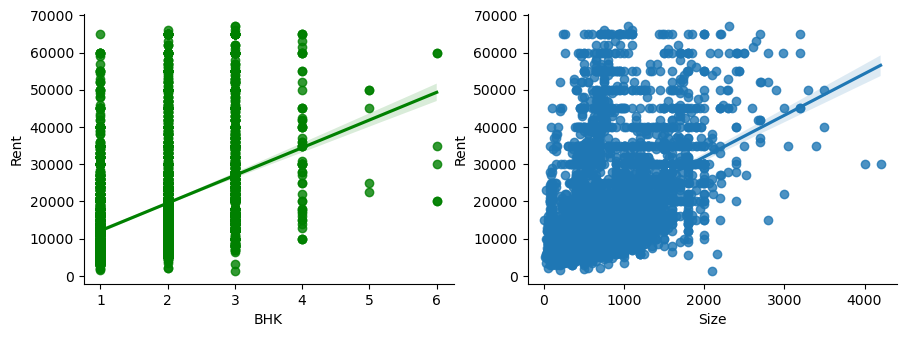

In [265]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10.5, 3.5)
sns.regplot(data=df_clean,x=df_clean[['BHK']],y=df_clean['Rent'],ax=axes[0],color='green')
sns.regplot(data=df_clean,x=df_clean['Size'],y=df_clean['Rent'],ax=axes[1])
sns.despine()

In [266]:
df_clean.shape

(4226, 12)

In [267]:
df_clean.describe()

,BHK,Rent,Size,Bathroom
count,4226.000000,4226.000000,4226.000000,4226.000000
mean,1.960483,19286.162565,871.779224,1.806200
std,0.746178,13825.395996,485.779381,0.711075
min,1.000000,1200.000000,10.000000,1.000000
25%,1.000000,9500.000000,520.000000,1.000000
50%,2.000000,15000.000000,800.000000,2.000000
75%,2.000000,25000.000000,1100.000000,2.000000
max,6.000000,67000.000000,4200.000000,7.000000


### Separating the features and target variable

In [268]:
X = df_clean.drop('Rent',axis = 1)[['BHK','Size']]
y = df_clean['Rent']

print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (4226, 2)
Shape of y =  (4226,)


#### Create train and test set

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(X_train)

(3380, 2) (846, 2) (3380,) (846,)


#### Linear Regression

In [270]:
reg=linear_model.LinearRegression()
model = reg.fit(X_train, y_train)
model

LinearRegression()

### y = m1*x1 + m2*x2 + c

In [271]:
coefficients=model.coef_
print(coefficients)

[4253.84206089    6.64463813]


In [272]:
c = model.intercept_
print(c)

5229.672960314185


In [273]:
coef_df = pd.DataFrame({"features": X.columns, 
                       "coefficients": np.squeeze(coefficients)})

display(coef_df)

,features,coefficients
0,BHK,4253.842061
1,Size,6.644638


In [274]:
reg.predict([[4,4000]])

C:\Users\ruhul.chowdhury\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48823.59373872])

In [275]:
4571.03529419*4+6.29803899*4000+4834.22728775547

48310.52442451547

In [276]:
y_pred=reg.predict(X_test)
y_pred

array([27958.15634354, 11809.138368  , 29951.54778366, 12473.60218137,
       21046.45902917, 25964.76490343, 13138.06599474, 13138.06599474,
       10812.44264794, 17259.01529295, 13138.06599474, 19053.06758906,
       15066.28470883, 19717.53140243, 17724.13996232, 21744.14603321,
       27958.15634354, 12473.60218137, 38989.52930082, 19385.29949574,
       17724.13996232, 12141.37027469, 12141.37027469, 10646.3266946 ,
       12739.38770672, 16727.44424226, 18056.371869  , 13071.61961341,
       26296.99681012, 12473.60218137, 12606.49494405, 23971.37346332,
       21710.92284254, 40185.56416489, 18189.26463168, 18720.83568237,
       24303.60537   , 22375.38665592, 13470.29790143, 20381.9952158 ,
       29951.54778366, 17724.13996232, 20381.9952158 , 12141.37027469,
       17724.13996232, 20049.76330912, 24635.83727669, 28921.62887293,
       14134.7617148 , 14601.16003947, 19053.06758906, 13802.52980811,
       22375.38665592, 29951.54778366, 18860.37308318, 21046.45902917,
      

In [277]:
# print(y_predict,'===',y_test)
type(y_pred)
type(y_test)

pandas.core.series.Series

#### Performance Evaluation
- Prediction Error
- Goodness of fit

In [278]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

r2 = r2_score(y_test, y_pred)#Goodness of fit-coefficent of determination
print("r_squared = ", r2)

MAE =  9314.370100279957
MSE =  151314056.72733378
RMSE =  12300.977876873601
r_squared =  0.2108434730359663


**Mean absolute error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
<br>**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
<br>**Root Mean Squared Error** is the square root of Mean Squared error. It measures the standard deviation of residuals.
<br>**Coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

# Compare the predicted target values with actual value

In [279]:
rent = pd.DataFrame({"Rent_actual":y_test,
                   "Rent_predicted": y_pred})

rent.head()

,Rent_actual,Rent_predicted
1998,22000,27958.156344
3190,5000,11809.138368
2670,37000,29951.547784
4647,8000,12473.602181
4488,15000,21046.459029


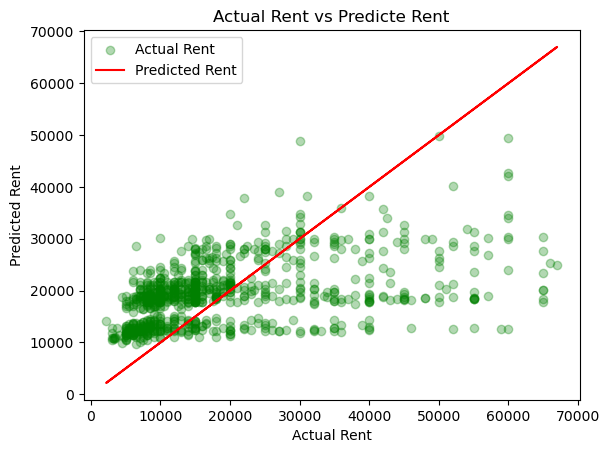

<Figure size 640x480 with 0 Axes>

In [280]:
plt.scatter(rent['Rent_actual'],rent['Rent_predicted'], color = 'green', alpha = 0.3)
plt.plot(rent['Rent_actual'],rent['Rent_actual'], color = 'red', alpha = 1)
plt.legend(['Actual Rent','Predicted Rent'])

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual Rent vs Predicte Rent')
plt.show()
plt.tight_layout()